In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from datetime import *
quandl.ApiConfig.api_key = 'mJs8xCEDp9WGJ95NaKNZ'

# 图一 加密货币汇率的极端波动

In [3]:
USD=quandl.get('BCHARTS/BITSTAMPUSD',start_date='2012-12-01',end_date='2015-05-31')

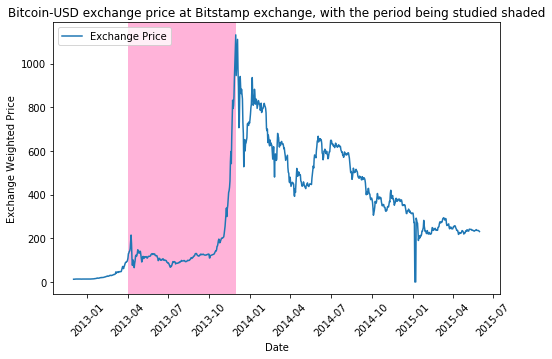

In [15]:
USD=USD.reset_index()
fig=plt.figure(figsize=(8,5))

plt.plot(USD['Date'], USD['Weighted Price'], label='Exchange Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Exchange Weighted Price')
plt.title('Bitcoin-USD exchange price at Bitstamp exchange, with the period being studied shaded')
plt.axvspan('2013-4-01', '2013-12-01', facecolor='#FF69B4', alpha=0.5)
plt.show()

# 划分账户种类

In [3]:
# 获取Mtgox JPY/BTC 价格
mtgoxUSD=quandl.get('BCHARTS/MTGOXUSD',start_date='2013-01-01',end_date='2013-12-31')
mtgoxUSD


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2013-01-01,13.51001,13.56000,13.16123,13.30413,28406.210995,3.788794e+05,13.337905
2013-01-02,13.35574,13.40000,13.16382,13.27999,17966.807256,2.391562e+05,13.311001
2013-01-03,13.28306,13.46400,13.24897,13.39786,18032.251434,2.408459e+05,13.356394
2013-01-04,13.42650,13.52000,13.27311,13.50000,29641.916334,3.978844e+05,13.423031
2013-01-05,13.50001,13.54800,13.31400,13.44000,21329.927292,2.869325e+05,13.452109
2013-01-06,13.44884,13.52100,13.35600,13.45395,12741.130852,1.714970e+05,13.460109
2013-01-07,13.51394,13.59000,13.40400,13.58755,25477.721418,3.440833e+05,13.505263
2013-01-08,13.55376,13.87998,13.50000,13.74275,42798.372790,5.872239e+05,13.720705
2013-01-09,13.79904,13.86225,13.62000,13.77001,28606.376645,3.931922e+05,13.744916


In [7]:
pre='12'
xlsname=pd.ExcelWriter(pre+'fen.xlsx')

In [4]:
# 读入待划分数据
f=open('13处理完毕.csv')
data=pd.read_csv(f)
data['Date']=pd.to_datetime(data['Date'].astype('datetime64[D]',format ='%Y-%m-%d'))
data.head()

,Trade_Id,Date,User_Id,Type,Currency,Bitcoins,Money_Rate,Money_JPY
0,1356998659486096,2013-01-01,231,buy,USD,36.874308,86.107,42896.280
1,1356998659486096,2013-01-01,110024,sell,USD,36.874308,86.107,42896.280
2,1356998738639088,2013-01-01,115248,buy,USD,11.682641,86.107,13640.820
3,1356998738639088,2013-01-01,56468,sell,USD,11.682641,86.107,13640.820
4,1356998739290677,2013-01-01,231,buy,USD,0.010000,86.107,11.633


In [5]:
grouped = data.pivot_table('Money_Rate',index='Date',columns='Currency')
Rate = grouped.USD
c = pd.DataFrame([Rate]).T
df = pd.merge(data,c,left_on=data.Date, right_index=True)
df['Money_USD']=df['Money_JPY']/df['USD']
df.drop(['key_0'], axis=1, inplace=True)
df['Price']=df['Money_USD']/df['Bitcoins']

In [6]:
mtg=mtgoxUSD[['High','Low']]
mtg.High=mtg.High*1.5
mtg.Low=mtg.Low*0.5
last = pd.merge(df,mtg,left_on=df.Date,right_index=True)
last.drop(['key_0','Currency','Money_JPY','Money_Rate','USD'], axis=1, inplace=True)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
last

,Trade_Id,Date,User_Id,Type,Bitcoins,Money_USD,Price,High,Low
0,1356998659486096,2013-01-01,231,buy,36.874308,498.174132,13.510061,20.34,6.580615
1,1356998659486096,2013-01-01,110024,sell,36.874308,498.174132,13.510061,20.34,6.580615
2,1356998738639088,2013-01-01,115248,buy,11.682641,158.417086,13.560040,20.34,6.580615
3,1356998738639088,2013-01-01,56468,sell,11.682641,158.417086,13.560040,20.34,6.580615
4,1356998739290677,2013-01-01,231,buy,0.010000,0.135099,13.509935,20.34,6.580615
5,1356998739290677,2013-01-01,231,sell,0.010000,0.135099,13.509935,20.34,6.580615
6,1356998788984963,2013-01-01,115248,buy,22.303224,302.432625,13.560040,20.34,6.580615
7,1356998788984963,2013-01-01,56468,sell,22.303224,302.432625,13.560040,20.34,6.580615
8,1356998789613887,2013-01-01,231,buy,0.010000,0.134414,13.441416,20.34,6.580615
9,1356998789613887,2013-01-01,231,sell,0.010000,0.134414,13.441416,20.34,6.580615


In [8]:
EHA=last[last.Price>last.High]
ELA=last[last.Price<last.Low]
# NMA=last[(last.Price>=last.Low)&(last.Price<=last.High)]
# NMA

In [27]:
EHA_list13=list(set(EHA.User_Id.values))#制作列表并且去重
ELA_list13=list(set(ELA.User_Id.values))#制作列表并且去重
print('EHA账户有%s'%len(EHA_list13))
print('ELA账户有%s'%len(ELA_list13))
pd.DataFrame(EHA_list13).to_csv('EHA_list13.csv', sep = ',', header = None,index = False)

EHA账户有2444
ELA账户有3912


## 合并EHA账户,并且去重

In [66]:
EHA_list12=pd.read_csv('EHA_list12.csv',header=None)
EHA_list13=pd.read_csv('EHA_list13.csv',header=None)
EHA_all=list(EHA_list12[0])+list(EHA_list13[0])
EHA_all=list(set(EHA_all))
len(EHA_all)

2649

## 找出EHA账户13年交易的所有内容

In [67]:
EHA_trade=last[last['User_Id'].isin(EHA_all)]
EHA_trade

,Trade_Id,Date,User_Id,Type,Bitcoins,Money_USD,Price,High,Low
0,1356998659486096,2013-01-01,231,buy,36.874308,498.174132,13.510061,20.34,6.580615
4,1356998739290677,2013-01-01,231,buy,0.010000,0.135099,13.509935,20.34,6.580615
5,1356998739290677,2013-01-01,231,sell,0.010000,0.135099,13.509935,20.34,6.580615
8,1356998789613887,2013-01-01,231,buy,0.010000,0.134414,13.441416,20.34,6.580615
9,1356998789613887,2013-01-01,231,sell,0.010000,0.134414,13.441416,20.34,6.580615
10,1356999014882697,2013-01-01,231,buy,2.000000,27.020126,13.510063,20.34,6.580615
18,1356999074564202,2013-01-01,231,buy,0.010000,0.135099,13.509935,20.34,6.580615
19,1356999074564202,2013-01-01,231,sell,0.010000,0.135099,13.509935,20.34,6.580615
24,1356999081108184,2013-01-01,231,buy,0.010000,0.135099,13.509935,20.34,6.580615
25,1356999081108184,2013-01-01,231,sell,0.010000,0.135099,13.509935,20.34,6.580615


## 像处理数据那样，去掉只有sell，或者只有buy的交易，然后setindex
## 得到EHA账户交易的所有完整交易

In [68]:
EHA_trade_grouped12=EHA_trade.pivot_table('Date',index='Trade_Id',columns='Type',aggfunc=len) 
EHA_trade_grouped12=EHA_trade_grouped12[(EHA_trade_grouped12['buy']==1) & (EHA_trade_grouped12['sell']==1)]
EHA_trade_end=EHA_trade[EHA_trade["Trade_Id"].isin(EHA_trade_grouped12.index)]
EHA_trade_end

,Trade_Id,Date,User_Id,Type,Bitcoins,Money_USD,Price,High,Low
4,1356998739290677,2013-01-01,231,buy,0.010000,0.135099,13.509935,20.34,6.580615
5,1356998739290677,2013-01-01,231,sell,0.010000,0.135099,13.509935,20.34,6.580615
8,1356998789613887,2013-01-01,231,buy,0.010000,0.134414,13.441416,20.34,6.580615
9,1356998789613887,2013-01-01,231,sell,0.010000,0.134414,13.441416,20.34,6.580615
18,1356999074564202,2013-01-01,231,buy,0.010000,0.135099,13.509935,20.34,6.580615
19,1356999074564202,2013-01-01,231,sell,0.010000,0.135099,13.509935,20.34,6.580615
24,1356999081108184,2013-01-01,231,buy,0.010000,0.135099,13.509935,20.34,6.580615
25,1356999081108184,2013-01-01,231,sell,0.010000,0.135099,13.509935,20.34,6.580615
28,1356999122374429,2013-01-01,231,buy,0.010000,0.135099,13.509935,20.34,6.580615
29,1356999122374429,2013-01-01,231,sell,0.010000,0.135099,13.509935,20.34,6.580615


In [65]:
EHA.to_excel(xlsname,sheet_name=('EHA'+pre))
ELA.to_excel(xlsname,sheet_name=('ELA'+pre))
NMA.to_excel(xlsname,sheet_name=('NMA'+pre))
xlsname.save()

KeyboardInterrupt: 

In [ ]:
xlsname.close()